In [9]:
import numpy as np
from itertools import takewhile
from PIL import ImageFont
import matplotlib.pyplot as plt
from matplotlib.font_manager import findfont, FontProperties

plt.style.use('default')

In [10]:
def watermark_fontsize(figure, watermark):
    # Get the default Matplotlib font
    default_font = findfont(FontProperties(family=['sans-serif']))
    
    # Fraction of the image where the Watermark is placed
    figure_fraction = 0.8
    
    # Get Figure width (Pixels)
    figure_wd = figure.get_figwidth() * figure.dpi
    
    # Get Watermark width (Pixels)
    watermark_wd = int(figure_fraction * figure_wd)

    # Calculate the scaled fontsize - iterate until the text size is larger than the text width and take the max value
    fontsize = max(takewhile(lambda i: ImageFont.truetype(default_font, i).getsize(watermark)[0] < watermark_wd, 
                    range(1, watermark_wd))) - 1
    print(f"Final fontsize: {fontsize}")
    return fontsize

In [11]:
# Some example data to display - https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Plot colors CMYK
plot_colors = "cmyk"

Final fontsize: 90


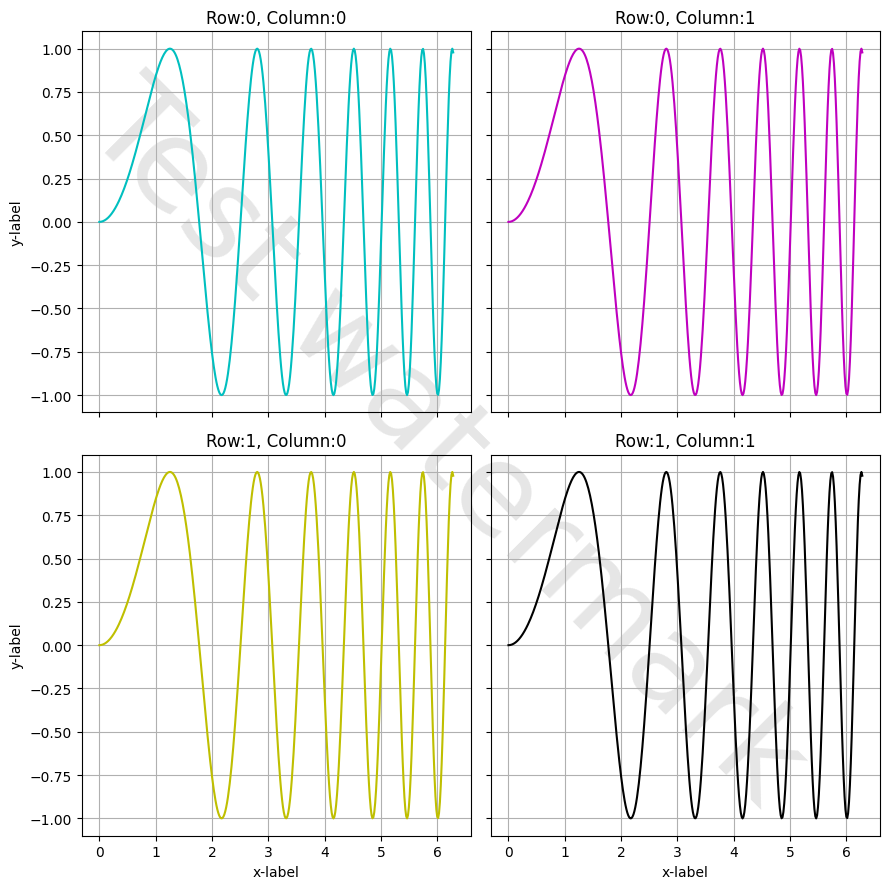

In [12]:
# Create 4 plots
fig, axs = plt.subplots(2, 2, figsize=(9, 9))

# Watermark text
watermark = "Test watermark"

# Get the scaled watermark fontsize
fontsize = watermark_fontsize(fig, watermark)

# Add the watermark to the center of the figure and set the drawing order to 0
fig.text(0.5, 0.5,
        watermark, 
        fontsize=fontsize,
        color='gray',
        alpha=0.2,
        ha='center',
        va='center',
        rotation='-45',
        zorder=0)

# Iterate the axes and plot the xy data
for i, ax in enumerate(axs.flat):
    ax.plot(x, y, c=plot_colors[i])
    
    # set background plot to transparent
    ax.patch.set_alpha(0)
    
    # get axes row, column number
    rownum = ax.get_subplotspec().rowspan.start
    colnum = ax.get_subplotspec().colspan.start
    
    # Set the title
    ax.set_title(f"Row:{rownum}, Column:{colnum}")
    
    # Set the labels
    ax.set(xlabel='x-label', ylabel='y-label')
    ax.label_outer()
    
    # Set the grid
    ax.grid()

# Change axes drawing order to 1
for i, ax in enumerate(axs.flat):
    ax.set_zorder(1)
        
fig.tight_layout()
fig.savefig('figure_with_watermark.png', dpi=300, bbox_inches="tight")